# Make histograms

This notebook makes two different figures
* A figure showing the performance of the network on three different kinds of data
* A figure showing the performance when the network is exposed to one, two, three or four images.

In [1]:
# import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import os
import sys

## Load the data from evaluating the networks

The .npz files have been created immediately after training by the ``validate_histogram.py`` script.

In [2]:
masterfolder = '../workflow/trained_networks/'
# Networks 

networks = ['MoS2_15pm', 'MoS2_supported_15pm', 'c2db_15pm']

maindata = dict()
for n in networks:
    histdata = np.load(os.path.join(masterfolder, n, 'histogram-epoch-model-0.npz'))
    maindata[n] = histdata
    
mos = maindata['MoS2_15pm']
mossup = maindata['MoS2_supported_15pm']
c2db = maindata['c2db_15pm']

c2dbcross = np.load(os.path.join(masterfolder, 
                                 'c2db_15pm', 
                                 'histogram-MoS2supported-data.npz'))
mos2cross = np.load(os.path.join(masterfolder, 
                                 'MoS2_supported_15pm', 
                                 'histogram-c2db-data.npz'))

In [3]:
list(maindata['MoS2_supported_15pm'].keys())

['rmse',
 'mae',
 'rel_rmse',
 'rmse_re',
 'rmse_im',
 'mae_re',
 'mae_im',
 'scram_rmse',
 'scram_mae',
 'scram_rmse_re',
 'scram_rmse_im',
 'scram_mae_re',
 'scram_mae_im']

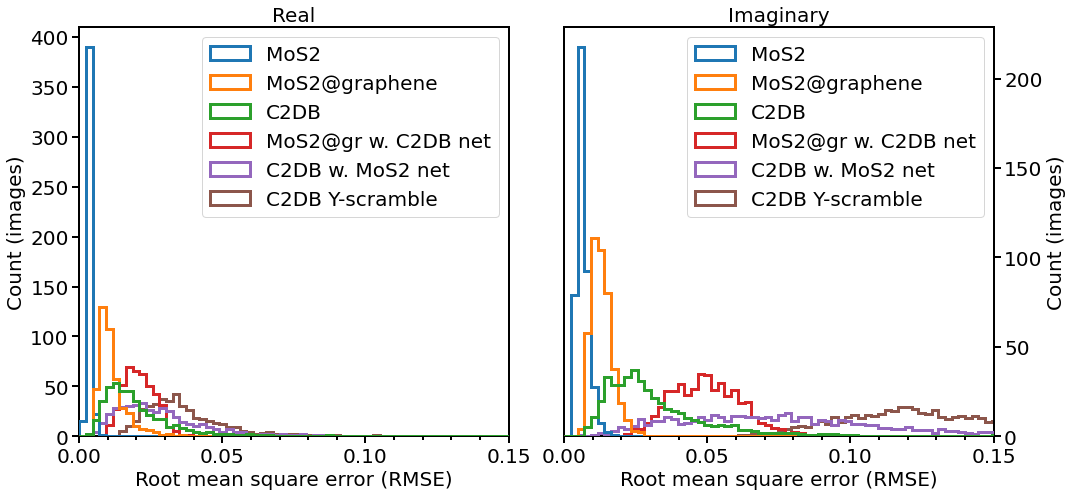

In [4]:
textsize=20

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
bins = 150
limits = (0, 0.35)

ax0.hist(mos['rmse_re'], histtype='step', label='MoS2', 
         zorder=4,
         linewidth=3, density=True, bins=bins, range=limits)
ax0.hist(mossup['rmse_re'], histtype='step', label='MoS2@graphene', 
         zorder=5,
         linewidth=3, density=True, bins=bins, range=limits)
ax0.hist(c2db['rmse_re'], histtype='step', label='C2DB', 
         zorder=6,
         linewidth=3, density=True, bins=bins, range=limits)
ax0.hist(c2dbcross['rmse_re'], histtype='step', label='MoS2@gr w. C2DB net', 
         zorder=2,
         linewidth=3, density=True, bins=bins, range=limits)
ax0.hist(mos2cross['rmse_re'], histtype='step', label='C2DB w. MoS2 net', 
         zorder=3,
         linewidth=3, density=True, bins=bins, range=limits)
ax0.hist(c2db['scram_rmse_re'], histtype='step', label='C2DB Y-scramble', 
         zorder=1,
         linewidth=3, density=True, bins=bins, range=limits)

ax1.hist(mos['rmse_im'], histtype='step', label='MoS2', 
         zorder=4,
         linewidth=3, density=True, bins=bins, range=limits)
ax1.hist(mossup['rmse_im'], histtype='step', label='MoS2@graphene', 
         zorder=5,
         linewidth=3, density=True, bins=bins, range=limits)
ax1.hist(c2db['rmse_im'], histtype='step', label='C2DB', 
         zorder=6,
         linewidth=3, density=True, bins=bins, range=limits)
ax1.hist(c2dbcross['rmse_im'], histtype='step', label='MoS2@gr w. C2DB net', 
         zorder=2,
         linewidth=3, density=True, bins=bins, range=limits)
ax1.hist(mos2cross['rmse_im'], histtype='step', label='C2DB w. MoS2 net', 
         zorder=3,
         linewidth=3, density=True, bins=bins, range=limits)
ax1.hist(c2db['scram_rmse_im'], histtype='step', label='C2DB Y-scramble', 
         zorder=1,
         linewidth=3, density=True, bins=bins, range=limits)

ax0.legend(fontsize=textsize)
ax1.legend(fontsize=textsize)
ax0.set_title('Real', fontsize=textsize)
ax1.set_title('Imaginary', fontsize=textsize)
#fig.suptitle('RMSE', fontsize=28);
ax0.set_xlim(0, 0.15)
ax1.set_xlim(0, 0.15)
for ax in (ax0, ax1):
    [i.set_linewidth(2) for i in ax.spines.values()]
    ax.xaxis.set_major_locator(MultipleLocator(0.05))
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.tick_params(axis='both', which='major', labelsize=textsize, length=7, width=2)
    ax.tick_params(axis='x', which='minor', length=4, width=2)
    ax.set_xlabel('Root mean square error (RMSE)', fontsize=textsize)
    ax.set_ylabel('Count (images)', fontsize=textsize)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig('fig_rmse_types.png', dpi=300)


## Histogram testing the number of input images

In [5]:

networks2 = ['img1_15pm', 'img2_15pm', 'MoS2_supported_15pm', 'img4_15pm']

ndata = [
    np.load(os.path.join(masterfolder, n, 'histogram-epoch-model-0.npz'))
    for n in networks2
]


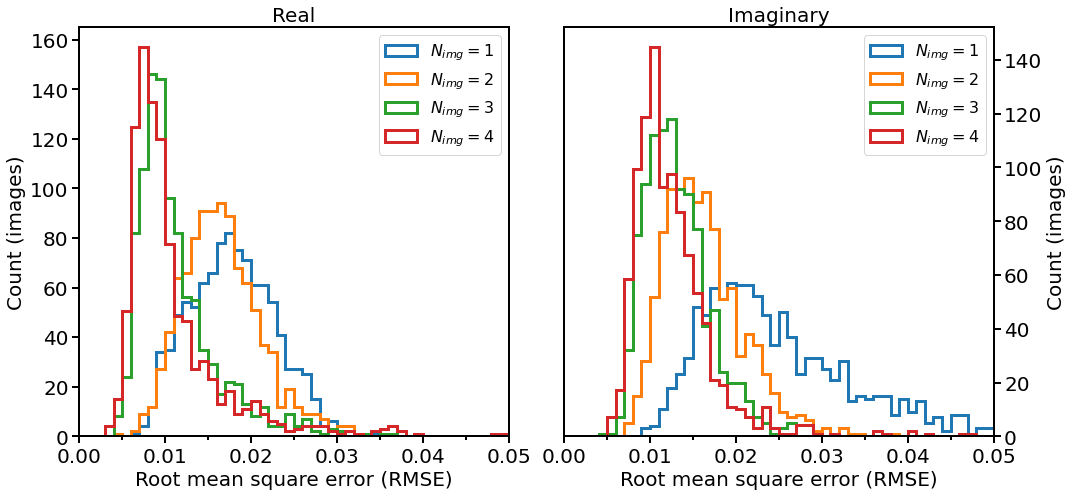

In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
bins = 100
limits = (0, 0.1)

for i, d in enumerate(ndata):
    
    ax0.hist(d['rmse_re'], histtype='step', label=f'$N_{{img}} = {i+1}$', 
         linewidth=3, density=True, bins=bins, range=limits)
    ax1.hist(d['rmse_im'], histtype='step', label=f'$N_{{img}} = {i+1}$', 
         linewidth=3, density=True, bins=bins, range=limits)
#ax0.hist(ndata[2]['scram_rmse_re'], histtype='step', label='Y-scramble', 
#         linewidth=3, density=True, bins=bins, range=limits)
#ax1.hist(ndata[2]['scram_rmse_im'], histtype='step', label='Y-scramble', 
#         linewidth=3, density=True, bins=bins, range=limits)

ax0.legend(fontsize=16)
ax1.legend(fontsize=16)
ax0.set_title('Real', fontsize=textsize)
ax1.set_title('Imaginary', fontsize=textsize)
#fig.suptitle('RMSE', fontsize=28);
ax0.set_xlim(0, 0.05)
ax1.set_xlim(0, 0.05)
for ax in (ax0, ax1):
    [i.set_linewidth(2) for i in ax.spines.values()]
    ax.xaxis.set_major_locator(MultipleLocator(0.01))
    ax.xaxis.set_minor_locator(MultipleLocator(0.005))
    ax.tick_params(axis='both', which='major', labelsize=textsize, length=7, width=2)
    ax.tick_params(axis='x', which='minor', length=4, width=2)
    ax.tick_params(axis='both', which='major', labelsize=textsize)
    ax.set_xlabel('Root mean square error (RMSE)', fontsize=textsize)
    ax.set_ylabel('Count (images)', fontsize=textsize)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig('fig_rmse_nimages.png', dpi=300)
